(deutschjozsa)=
# Introducción.
```{index} Deutsch Jozsa (Algoritmo)
```

Este algoritmo fue diseñado por un lado por <a herf="https://es.wikipedia.org/wiki/David_Deutsch" target="_blank"> David Deutsh </a>,  profesor de la Universidad de Oxfort (conocido por su teoría de los universos paralelos) y por otro lado  por <a href="https://en.wikipedia.org/wiki/Richard_Jozsa" target="_blank"> Richard Jozsa </a> matemático en la Universidad de Cambrige. La explicación de este algoritmo de una forma muy didáctica la  podemos ver en este vídeo de Ket.G.

Para comenzar, vamos a dar las siguientes definiciones, suponiendo que tenemos una función que vamos a denominar f que sólo puede tomar los valores 0 ó 1:

* La función f será **constante** si en todos los casos del dominio de definición obtenemos el valor 0 o bien el vaor 1.

* La función f será **balanceada** si en la mitad de los casos obtenemos el valor 0 y en la otra mitad el valor 1.

De acuerdo con estas definiciones, si contamos con una función que es constante o balanceada, ¿Cuántas veces tenemos que evaluar esta función para estar seguro de qué tipo es?. Con la computación clásica y suponiendo tenemos n números, habría que evaluar la función un máximo de n/2+1 veces para saber con seguridad si la función es constante o balanceada (<a href="https://www.youtube.com/watch?v=G0pctFUOFNM&t=18s" target="_blank"> ver este vídeo </a>). Si teneos muchos números estas evaluaciones pueden crecer muchísimo en cantidad de comprobaciones.

Sin embargo el algoritmo de Detsch Jozsa lo que consigue es este resultado con una sola evaluación. Este es uno de los primeros resultados que demuestra el poder de la computación cuántica.

Si al montar el circuito indicado en <a href="https://www.youtube.com/watch?v=G0pctFUOFNM&t=18s" target="_blank">  este vídeo </a> y obtenemos como resultado un valor de cero, entonces diremos que la función es constante y en caso contrario será equilibrada. El circuito con el que se trabaja en este algoritmo es el siguiente:


![](../images/deutschJozsa.PNG)

La demostración matemática de este algoritmo la podemos <a href="..\documentos\Algoritmo_Deutsch_Jozsa.pdf" target="_blank"> ver en este documento pdf </a> obtenido gracias a <a href="https://www.youtube.com/@KetPuntoG/videos" target="_blank"> los vídeos de Ket.G </a>.

Para fijar más las ideas, vamos a suponer que la función f toma como entrada una cadena de bits y devuelve 0 ó 1, es decir:

$$f(\{x_{0},x_{1},...,\})\longrightarrow0\ \acute{o}\ 1\quad donde\ x_{i}\ vale\ 0\ \acute{o}\ 1$$

Como ya hemos dicho, con la solución cuántica podremos saber si la función es constante o equilibrada con una sola evaluación de la función f(x), de tal manera que esta función f está implementada dentro de un oráculo cuántico el cual mapea el estado $|x\rangle |y\rangle$ en $|x\rangle |y \oplus f(x)  \rangle $. Este esquema puede verse en la imagen mostrada anteriormente.

Veamos todo lo anterior con un función de ejemplo que actúa sobre dos bits. Esta función va a ser la siguiente:

$$f(x_{0},x_{1})=x_{0}\oplus x_{1}$$

De tal manera que se obtiene lo siguiente:

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

A continuación vamos aplicar el algoritmo de Deutsch Jozsa para comprobar que con un intento podemos corroborar que nuestra función es balanceada tal y como la hemos definido. Primero lo hacemos de una forma totalmente teórica y después utilizaremos código para obtener el mismo resultado.

Arrancamos de la situación inicial mostrada en la figura anterior, es decir los dos primeros qubits a $|0\rangle$ y el tercero a $|1\rangle$.

$$|\psi_{0}\rangle=|00\rangle_{01}\otimes|1\rangle_{2}$$

Con la anterior notación indicamos lo siguiente:

1) El primer registro de dos qubits está inicializado a $|00\rangle$ y el segundo registro de un solo qubits está en el estado $|1\rangle$. Esto queda denotado para mayor claridad por los subíndices 0, 1 y  2.

2) Ahora aplicamos una puerta de Hadamard a todos los qubits y obtenemos:


$$|\psi_{1}\rangle=\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)_{01}\otimes\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)_{2}$$

3) La función oracle para este ejemplo puede ser implementada mediante lo siguiente $\mathrm{Q}_{f}=C X_{02}C X_{12}$. Es decir aplicamos de forma consecutiva dos puertas de tipo control-X. La situación la podemos reproducir sobre Quirk, donde uno de los estados se puede ver en la siguiente figura:

![](../images/quirtkJozsa.PNG)

En la imagen anterior se puede ver que si los dos primeros qubits están en $|01\rangle$ entonces la salida del tercer qubit ( que es la imagen de f) está en 1 (es decir $f(1,0)=1$). Podemos comprobar que si cambiamos los dos primeros estados los resultados son los mismos que cuando hemos presentado y definido la función. Por lo tanto esta puerta nos sirve para este trabajo.

Aplicando ahora esta puerta, obtenemos la siguiente salida

$|\psi_{2}\rangle=\frac{1}{2\sqrt{2}}\left[\underbrace{|00\rangle_{01}\otimes(|0\oplus0\oplus0\rangle-|1\oplus0\oplus0\rangle)_{2}}_{=|00\rangle_{01}\otimes(|0\oplus f(0,0)-|1\oplus f(0,0))_{2}}+\underbrace{|01\rangle_{01}\otimes(|0\oplus0\oplus1\rangle-|1\oplus0\oplus1\rangle)_{2}}_{=|01\rangle_{01}\otimes(|0\oplus f(0,1)-|1\oplus f(0,1))_{2}}+\underbrace{|10\rangle_{01}\otimes(|0\oplus1\oplus0\rangle-|1\oplus1\oplus0\rangle)_{2}}_{=|10\rangle_{01}\otimes(|0\oplus f(1,0)-|1\oplus f(1,0))_{2}}\right]$

$+\left[\underbrace{|11\rangle_{01}\otimes(|0\oplus1\oplus1\rangle-|1\oplus1\oplus1\rangle)}_{=|101\rangle\otimes(|0\oplus f(1,1)-|1\oplus f(1,1))_{2}}\right]$


Simplificando se tiene:

$|\psi_{2}\rangle=\frac{1}{2\sqrt{2}}\left[|00\rangle_{01}\otimes(\underbrace{|0\oplus0\oplus0\rangle}_{|0\rangle}-\underbrace{|1\oplus0\oplus0}_{|1\rangle}\rangle)_{2}+|01\rangle_{01}\otimes(\underbrace{|0\oplus0\oplus1}_{|1\rangle}\rangle-\underbrace{|1\oplus0\oplus1}_{|0\rangle}\rangle)_{2}+|10\rangle_{01}\otimes(\underbrace{|0\oplus1\oplus0}_{|1\rangle}\rangle-|\underbrace{1\oplus1\oplus0}_{|0\rangle}\rangle)_{2}\right]$


$+\left[|11\rangle_{01}\otimes\underbrace{(|0\oplus1\oplus1\rangle}_{|0\rangle}-|\underbrace{1\oplus1\oplus1}_{|1\rangle}\rangle)\right]$

Es decir:

$$|\psi_{2}\rangle=\frac{1}{2\sqrt{2}}[|00\rangle_{01}\otimes(|0\rangle-|1\rangle)_{2}-|01\rangle_{01}\otimes(|0\rangle-|1\rangle)_{2}-|10\rangle_{01}\otimes(|0\rangle-|1\rangle)_{2}+|11\rangle_{01}\otimes(|0\rangle-|1\rangle)_{2}=$$

$$={\frac{1}{2}}(|00\rangle-|01\rangle-|10\rangle+|11\rangle)_{01}\otimes{\frac{1}{\sqrt{2}}}(|0\rangle-|1\rangle)_{2}$$

$$=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)_{0}\otimes\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)_{1}\otimes\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)_{2}$$

4) Ahora aplicamos una puerta de Hadamart al primer registro (Es decir los dos primeros qubits) y se obtiene:

$$|\psi_{3}\rangle=|1\rangle_{0}\otimes|1\rangle_{1}\otimes(|0\rangle-|1\rangle)_{2}$$


5) Ahora haciendo una medición sobre los dos primeros qubits se obtiene 11, es decir por el teorema de Deutsch-Jozsa se obtiene que la función es balanceada.

Veamos esto mismo pero utilizando código.

## Creación de los oráculos.

Vamos a ver en este apartado algunos caminos para crear este tipo de puertas cuánticas.

1) En primer lugar supongamos que la función *f es un función constante*:

1.a) Si f(x)=0 entonces aplicamos una puerta I en el qubit del registro 2.

1. b) Si f(x)=1 entonces aplicamos una puerta X en el qubit del registro 2.

y así de fácil tendríamos generado la puerta $U_f$.

Pongámonos a continuación en el caso de que *f es balanceada*. En este caso hay muchas formas de crear este tipo de circuitos que generan este oráculo, veamos en este apartado como conseguirlo utilizando puertas CNOT con control en cada cada uno de los qubits del registro 1 y target en el qubit del registro 2.

Construimos un ejemplo con Quirk de la manera que se muestra en la figura siguiente:

![](../images/puertaBalanceada.PNG)

En la imagen anterior, los tres qubits superiores forman el registro de entrada y el qubit de abajo el registro de salida. Podemos ver los estados que generan un valor de cero o uno como salida (se puede comprobar la salida que Quirk)

| estados salida 0 | estados salida 1 |
|------------------|------------------|
| 000              | 001              |
| 011              | 100              |
| 101              | 010              |
| 110              | 111              |

En consecuencia se puede ver que obtenemos el mismo número de veces el 0 como el 1.

También podemos cambiar el circuito a otro como el siguiente:

![](../images/puertaBalanceada2.PNG)


En esta situación los resultados que se obtienen son los siguientes (comprobar con quirk):

| estados salida 0 | estados salida 1 |
|------------------|------------------|
| 001              | 000              |
| 010              | 011              |
| 100              | 101              |
| 111              | 110              |


Después de estos preámbulos procedemos a continuación a su implementación en qiskit, que como se ha visto se prueba el algoritmo en esta ocasión para tres qubits en el registro 1 y uno en el registro 2.

Procedemos primero a hacer las correspondientes importaciones:

In [1]:

# Para poder usar from qiskit.providers.ibmq import least_busy
#!pip install qiskit-ibmq-provider

In [2]:

import numpy as np

# importando Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# importando herramienta de plot básica
from qiskit.visualization import plot_histogram

A continuación definimos el tamaño de los registros de entrada para el oráculo

In [3]:
# Establecemos la longitud de los n-bits 
n=3

### Construcción de un oráculo constante

Siguiendo las ideas vistas anteriormente, construimos a continuación un oráculo constante, de tal manera que dependiendo del número aleatorio que obtengamos construimos un oráculo constante que sea iguala 0 o igual a 1 

Creamos un oráculo con salida 0


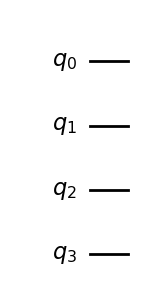

In [4]:
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    print("Creamos un oráculo con salida 1")
    const_oracle.x(n)
else:
    print("Creamos un oráculo con salida 0")

const_oracle.draw('mpl')

### Construcción de un oráculo balanceado

Construimos a continuación un circuito balanceado, teniendo en cuenta que vamos a construir un string que indica los qubits de de entrada. Si uno de esos qubit está a 1 lo transformamos a 0 mediante una puerta X

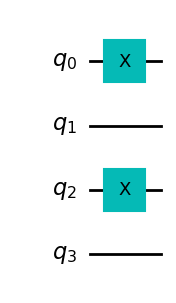

In [5]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# colocamos la pueras X en los bits igual a 1
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

A continuación añadimos las puertas CNOT, poniendo barreras en el circuito para diferenciar cada apartado.

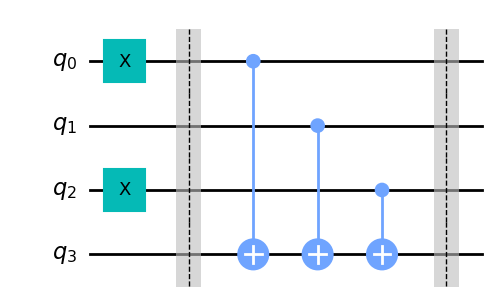

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# colocamos la pueras X en los bits igual a 1
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Usamos las barreras para diferenciar las partes
balanced_oracle.barrier()

# Controlled-NOT puertas
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

Finalmente añadimos las puertas X en los qubits 0 y 2 para así obtener un oráculo balanceado

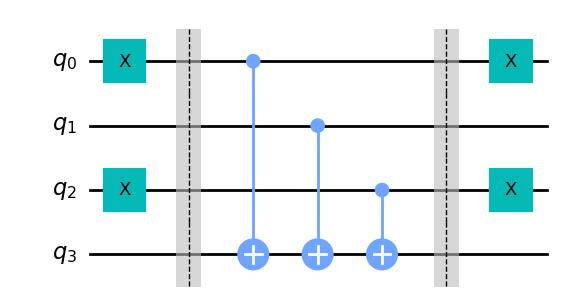

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# colocamos la pueras X en los bits igual a 1
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Usamos las barreras para diferenciar las partes
balanced_oracle.barrier()

# Controlled-NOT puertas
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# colocamos X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

Una vez creados los oráculos correspondientes procedemos a comprobar el algoritmo de Deutsch-Jozsa. Lo primero que hay que hacer es pasar una puerta de Hadamart sobre los primeros tres estados y en el cuarto pasarlo al estado 1 y después aplicar otra puerta de Hadamart

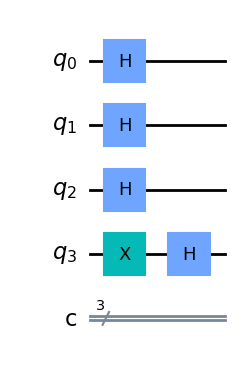

In [8]:
dj_circuit = QuantumCircuit(n+1, n)

# Añadimos H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Punemos el qubit en el esatdo |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

Ahora aplicamos un oráculo balanceado que se ha construido anteriormente

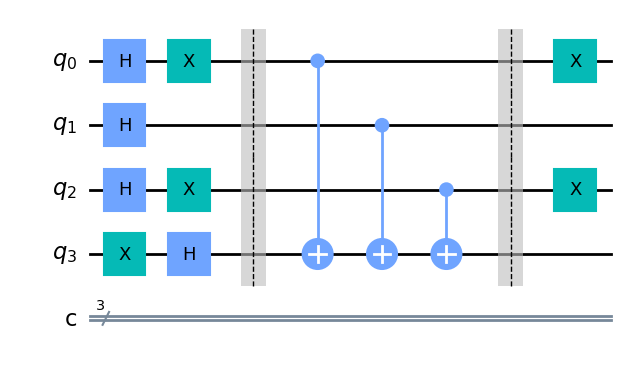

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

# Añadimos H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Punemos el qubit en el esatdo |->
dj_circuit.x(n)
dj_circuit.h(n)

# Añadimos el oráculo
dj_circuit = dj_circuit.compose(balanced_oracle)

dj_circuit.draw('mpl')

Finalmente aplicamos una puerta de Hadamrt sobre los tres primero qubits y medimos los tres primeros qubits (los del registro 1)

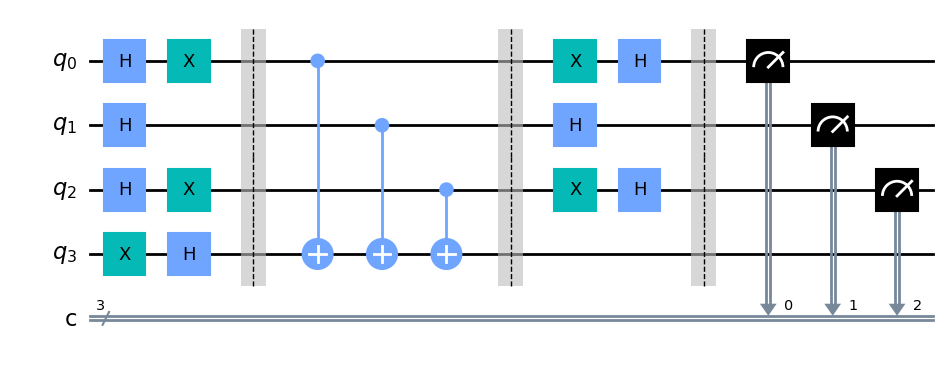

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Añadimos H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Punemos el qubit en el esatdo |->
dj_circuit.x(n)
dj_circuit.h(n)

# Añadimos el oráculo
dj_circuit = dj_circuit.compose(balanced_oracle)

# Añadimos H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Medimos
for i in range(n):
    dj_circuit.measure(i, i)

# Dibujamos el circuito
dj_circuit.draw('mpl')

Veamos a continuación el output

In [11]:
#!pip install qiskit-aer

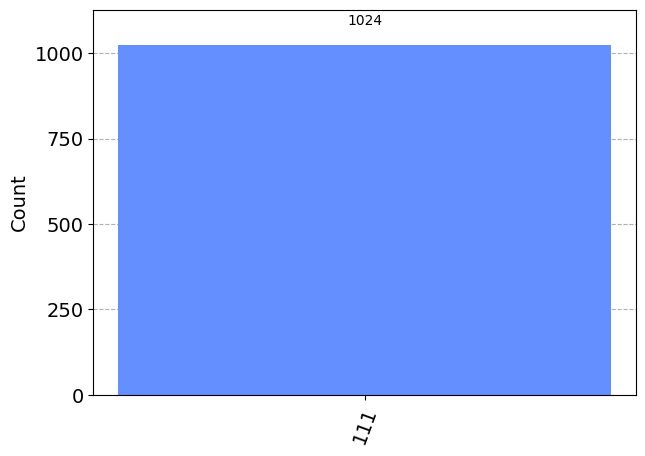

In [12]:
# usamos local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

Como podemos observar el resultado es 111 al 100% por lo que según al algoritmo de Deutsch-Jozsa la función será balanceada. Como ejercicio, se deja que el lector pruebe con el oráculo constante (const_oracle), definido anteriormente y compruebe que la salida en este caso es 000

### Función para crear el algortimo de Deutsch_jozsa

A continuación se propone una función que generaliza los casos vistos anteriormente. Tiene el parámetro *case* que puede tomar el valor 'balanced' o 'constant' y el tamaños de los qubits designado con el parámetro n

In [13]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

A continuación va la función que toma el oráculo creado con la anterior función y formula el algoritmo de Deutsch_Jozsa

In [14]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Finalmente usamos los códigos anteriores

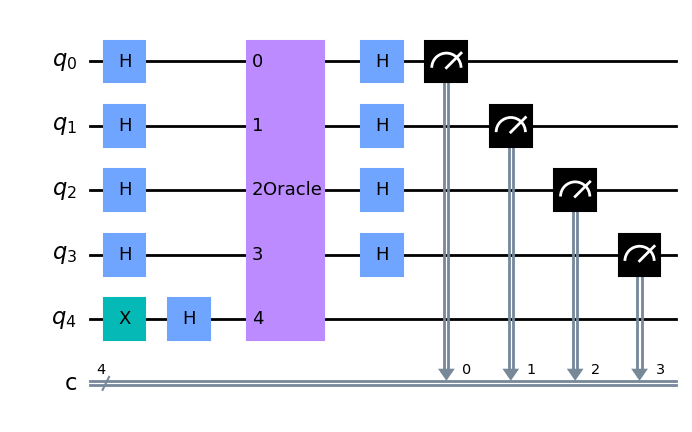

In [15]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

Y a continuación ejecutamos el circuito

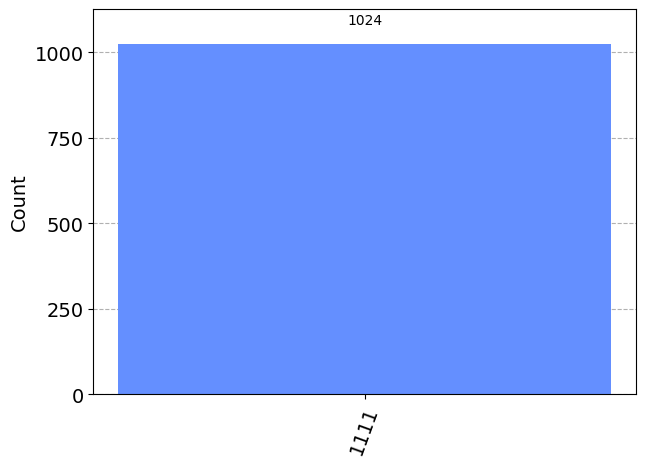

In [16]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

Existe otra posibilidad de crear un oráculo balanceado o constante.

La función *dj_problem_oracle* (que figura abajo) devuelve un oráculo Deutsch-Jozsa para n = 4 en forma de puerta. La puerta toma 5 qubits como entrada donde el qubit final (q_4) es el qubit de salida (como con los oráculos de ejemplo anteriores). Puedes obtener diferentes oráculos dando a *dj_problem_oracle* diferentes enteros entre 1 y 5. Usa el algoritmo Deutsch-Jozsa para decidir si cada oráculo está equilibrado o es constante (Nota: Es muy recomendable que pruebes este ejemplo usando el aer_simulator en lugar de un dispositivo real).

In [17]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

In [18]:
type(oracle)

qiskit.circuit.gate.Gate